In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Đọc file,gộp file

In [3]:
data = pd.read_excel('Tay Bac Bo.xlsx',sheet_name=None)
dataFrames={}
dfs = []
for sheet_name, sheet_data in data.items():
  df = pd.DataFrame(sheet_data)
  dfs.append(df)
  dataFrames[sheet_name] = df
combined_df = pd.concat(dfs)
f1 = dataFrames['Lao_Cai']
f2 = dataFrames['Yen_Bai']
f3 = dataFrames['Dien_Bien']
f4 = dataFrames['Lai_Chau']
f5 = dataFrames['Son_La']
f6 = dataFrames['Hoa_Binh']

In [4]:
average_df = pd.DataFrame()
average_df['Day'] = f1['Day']
average_df['TempeMax'] = (f1['Temperature Max'] + f2['Temperature Max'] + f3['Temperature Max'] +
                          f4['Temperature Max'] + f5['Temperature Max'] + f6['Temperature Max']) / 6
average_df['TempMin'] = (f1['Temperature Min'] + f2['Temperature Min'] + f3['Temperature Min'] +
                         f4['Temperature Min'] + f5['Temperature Min'] + f6['Temperature Min']) / 6
average_df['TempAvg'] = (f1['Temperature Avg'] + f2['Temperature Avg'] + f3['Temperature Avg'] +
                         f4['Temperature Avg'] + f5['Temperature Avg'] + f6['Temperature Avg']) / 6
average_df['MaxWind_km/h'] = (f1['MaxWind_km/h'] + f2['MaxWind_km/h'] + f3['MaxWind_km/h'] +
                              f4['MaxWind_km/h'] + f5['MaxWind_km/h'] + f6['MaxWind_km/h']) / 6
average_df['TotalPrecip_mm'] = (f1['TotalPrecip_mm'] + f2['TotalPrecip_mm'] + f3['TotalPrecip_mm'] +
                                f4['TotalPrecip_mm'] + f5['TotalPrecip_mm'] + f6['TotalPrecip_mm']) / 6
average_df['AvgHumidity'] = (f1['Humidity Avg'] + f2['Humidity Avg'] + f3['Humidity Avg'] +
                             f4['Humidity Avg'] + f5['Humidity Avg'] + f6['Humidity Avg']) / 6
average_df

,Day,TempeMax,TempMin,TempAvg,MaxWind_km/h,TotalPrecip_mm,AvgHumidity
0,2022-06-29,28.166667,22.816667,25.316667,5.816667,11.120000,86.333333
1,2022-06-30,26.216667,22.183333,24.100000,4.500000,30.433333,91.666667
2,2022-07-01,28.016667,22.433333,24.916667,3.933333,6.383333,89.000000
3,2022-07-02,31.933333,23.016667,26.950000,5.833333,1.916667,80.000000
4,2022-07-03,31.333333,23.216667,26.833333,7.266667,3.416667,82.666667
...,...,...,...,...,...,...,...
362,2023-06-26,25.916667,20.316667,22.933333,5.850000,20.566667,92.000000
363,2023-06-27,27.850000,20.833333,24.200000,6.500000,21.300000,90.666667
364,2023-06-28,29.433333,21.666667,25.533333,7.866667,17.950000,86.500000
365,2023-06-29,30.366667,22.350000,26.100000,7.483333,12.733333,85.333333


##Phân tích trên data trung bình 10 tháng

+ Phan Tich du lieu cua 1 vung

In [5]:
average_df.isnull().sum()

Day               0
TempeMax          0
TempMin           0
TempAvg           0
MaxWind_km/h      0
TotalPrecip_mm    0
AvgHumidity       0
dtype: int64

+ Ta thấy tập dữ liệu vô cùng sạch với 366 dòng khong hề chưa giá trị NULL nào

In [6]:
average_df['TotalPrecip_mm'][349]

104.64999999999999

In [7]:
average_df['TotalPrecip_mm'].idxmax()
average_df['TotalPrecip_mm'][average_df['TotalPrecip_mm'].idxmax()]

104.64999999999999

In [8]:
max_precip_day = average_df['Day'][average_df['TotalPrecip_mm'].idxmax()]
max_precip_day

'2023-06-13'

In [ ]:
average_df['Day'].duplicated().sum()

0

+ Không tồn tại giá trị trùng lặp

In [ ]:
average_df.dtypes

Day                object
TempeMax          float64
TempMin           float64
TempAvg           float64
MaxWind_km/h      float64
TotalPrecip_mm    float64
AvgHumidity       float64
dtype: object

+ Ta thấy kiểu day đang là object mà kiểu của ngày là date vậy định dạng đang sai nên ta chuyển lại kiểu của day vè date

In [14]:
f5["Day"] = pd.to_datetime(f5["Day"])

In [15]:
#kiểm tra lại
f5.dtypes

Day                datetime64[ns]
Temperature Max           float64
Temperature Min           float64
Temperature Avg           float64
MaxWind_km/h              float64
TotalPrecip_mm            float64
Humidity Avg                int64
Comment                    object
UV Index                    int64
dtype: object

In [17]:
f5

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index,Month
0,2022-06-29,25.8,21.6,23.5,3.6,12.2,94,Moderate or heavy rain shower,6,6
1,2022-06-30,25.3,22.1,23.1,4.0,43.7,97,Moderate or heavy rain shower,6,6
2,2022-07-01,27.9,22.0,23.9,3.2,4.1,93,Heavy rain at times,6,7
3,2022-07-02,30.4,21.7,25.2,4.0,3.4,84,Moderate rain at times,7,7
4,2022-07-03,29.0,22.4,25.2,6.5,3.0,88,Patchy rain possible,6,7
...,...,...,...,...,...,...,...,...,...,...
362,2023-06-26,25.1,19.3,22.3,4.0,21.6,92,Moderate or heavy rain shower,6,6
363,2023-06-27,26.9,19.2,22.9,3.6,29.9,92,Moderate or heavy rain shower,6,6
364,2023-06-28,28.2,20.6,24.0,4.7,28.5,88,Patchy light rain with thunder,6,6
365,2023-06-29,28.0,21.2,24.3,4.3,17.1,87,Moderate or heavy rain shower,6,6


## Vẽ đồ thị nhận xét mô hình

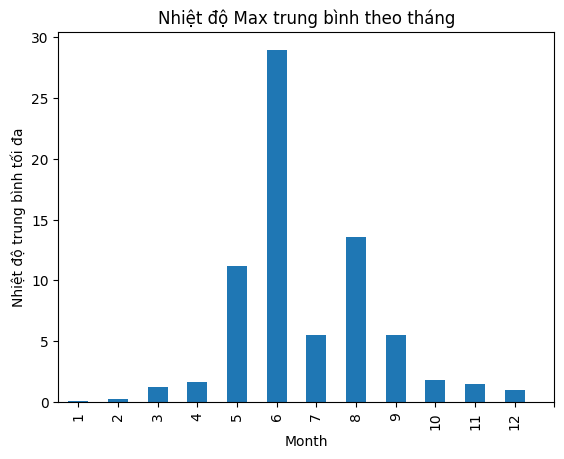

In [18]:
# Tạo cột "Month" để lưu giữ thông tin về tháng của mỗi ngày
f5["Month"] = f5["Day"].dt.month
# Gom nhóm dữ liệu theo cột "Month" và tính trung bình của cột "TempeMax" cho mỗi nhóm
average_temp_by_month = f5.groupby("Month")["TotalPrecip_mm"].mean()
average_temp_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Nhiệt độ trung bình tối đa")
plt.title("Nhiệt độ Max trung bình theo tháng")
plt.xticks(range(0, 13))
plt.show()

<ipython-input-13-db780566a848>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_by_month = average_df.groupby("Month").mean()


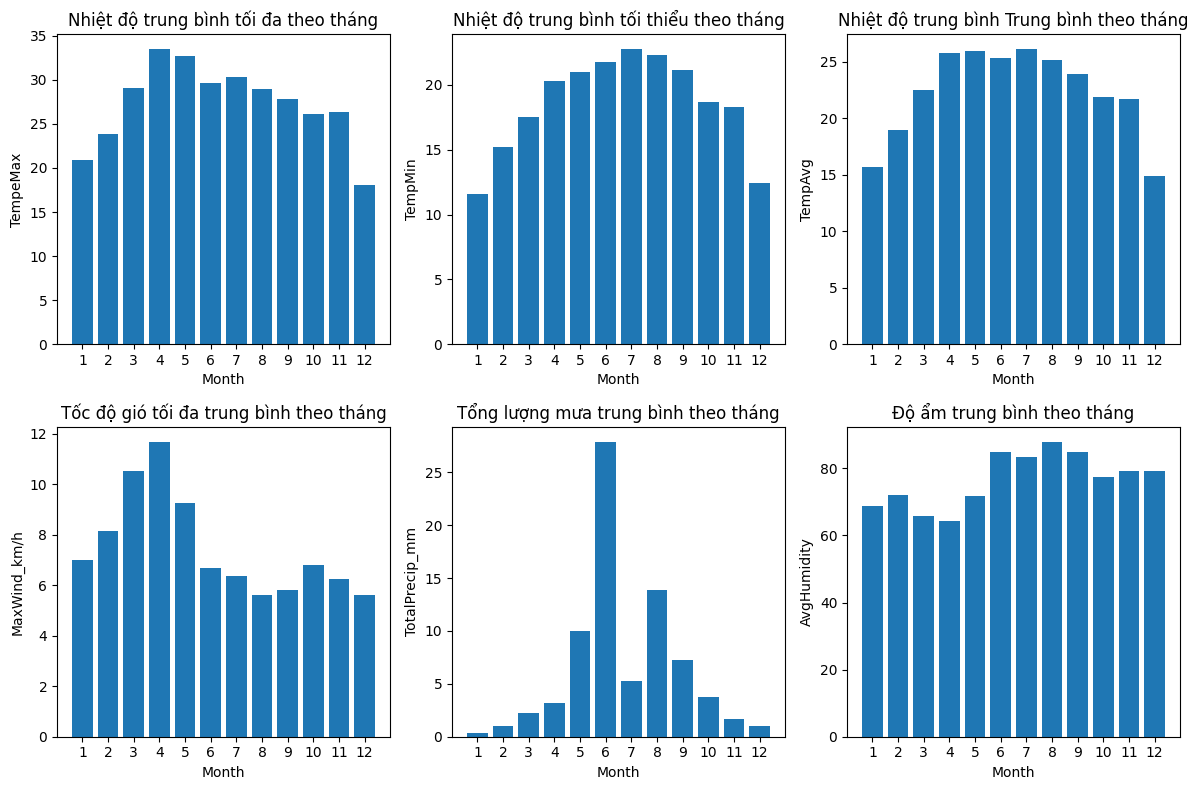

In [ ]:
import matplotlib.pyplot as plt

# Tạo cột "Month" để lưu giữ thông tin về tháng của mỗi ngày
average_df["Month"] = average_df["Day"].dt.month

# Gom nhóm dữ liệu theo cột "Month" và tính trung bình của các thuộc tính cho mỗi nhóm
average_by_month = average_df.groupby("Month").mean()

# Tạo lưới 2x3 cho 6 biểu đồ
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].bar(average_by_month.index, average_by_month["TempeMax"])
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("TempeMax")
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_title("Nhiệt độ trung bình tối đa theo tháng")

axes[0, 1].bar(average_by_month.index, average_by_month["TempMin"])
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("TempMin")
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_title("Nhiệt độ trung bình tối thiểu theo tháng")

axes[0, 2].bar(average_by_month.index, average_by_month["TempAvg"])
axes[0, 2].set_xlabel("Month")
axes[0, 2].set_ylabel("TempAvg")
axes[0, 2].set_xticks(range(1, 13))
axes[0, 2].set_title("Nhiệt độ trung bình Trung bình theo tháng")

axes[1, 0].bar(average_by_month.index, average_by_month["MaxWind_km/h"])
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("MaxWind_km/h")
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_title("Tốc độ gió tối đa trung bình theo tháng")

axes[1, 1].bar(average_by_month.index, average_by_month["TotalPrecip_mm"])
axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("TotalPrecip_mm")
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_title("Tổng lượng mưa trung bình theo tháng")

axes[1, 2].bar(average_by_month.index, average_by_month["AvgHumidity"])
axes[1, 2].set_xlabel("Month")
axes[1, 2].set_ylabel("AvgHumidity")
axes[1, 2].set_xticks(range(1, 13))
axes[1, 2].set_title("Độ ẩm trung bình theo tháng")

plt.tight_layout()
plt.show()

+ Với đồ thì <Nhiệt độ trung bình tối đa theo tháng> ta thấy nhiệt độ max trung bình của 10 tỉnh không quá cao trong khoảng(12->25)
+ mức nhiệt cao nhật được ghi nhật là của tháng 4 đạt gần 35 độ
   + => kết luật nhiệt độ của tỉnh sơn la tương đối mát, lạnh
+ độ ẩm trong năm tương đối cao giao động từ 70% đến 90%

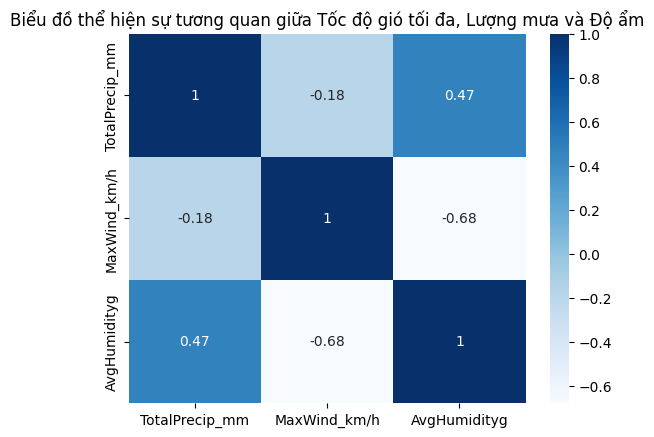

In [ ]:
data = {'TotalPrecip_mm': average_df['TotalPrecip_mm'],
        'MaxWind_km/h': average_df['MaxWind_km/h'],
        'AvgHumidityg': average_df['AvgHumidity']}
df = pd.DataFrame(data)
# Tính ma trận hệ số tương quan
corr_matrix = df.corr()
# Vẽ biểu đồ hệ số tương quan
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Biểu đồ thể hiện sự tương quan giữa Tốc độ gió tối đa, Lượng mưa và Độ ẩm")
plt.savefig('Biểu đồ thể hiện sự tương quan giữa Tốc độ gió tối đa, Lượng mưa và Độ ẩm', dpi=300, bbox_inches='tight')
plt.show()

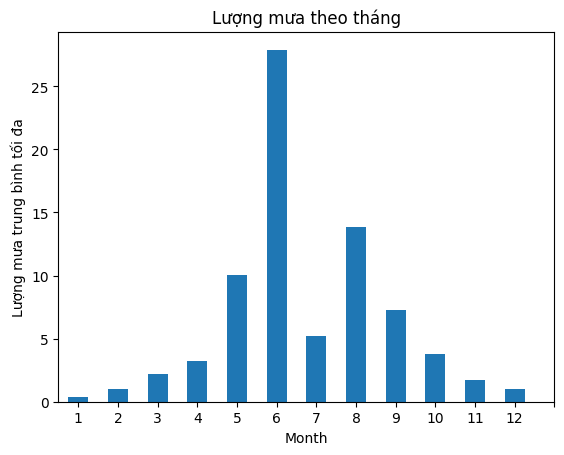

In [ ]:
# Tạo cột "Month" để lưu giữ thông tin về tháng của mỗi ngày
average_df["Month"] = average_df["Day"].dt.month
# Gom nhóm dữ liệu theo cột "Month" và tính trung bình của cột "TempeMax" cho mỗi nhóm
average_temp_by_month = average_df.groupby("Month")["TotalPrecip_mm"].mean()
average_temp_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Lượng mưa trung bình tối đa")
plt.title("Lượng mưa theo tháng")
plt.xticks(range(0, 13),rotation=0)
plt.show()

+ Ta thấy lượng mưa lớn nhất <đỉnh điểm> ở tháng 6 và sao đó giảm dần ở 2 sườn cho thấy đây có lẽ là tháng tập trung nhiều cơn bão của năm
  + ở tháng này việc tập trung chăn nuôi cũng như cây trồng là không tốt vì mưa nhiều sẽ
    + làm hỏng ,úng lúa mầu rau củ
    + sẽ dẫn đến tình trang ngập lụt kéo theo chăn nuôi gặp khó khăn
+ lượng mưa thấp nhất là vào tháng 1 <Đạt Đáy> có thể nói tháng 12 và tháng 1 là 2 tháng có lượng mưa thấp nhất cũng một phần là nhưng tháng đông và cận đông nê lượng hơi nước tích trữ tương đối ít <không có>

+ vào những tháng mùa hè như tháng 7 việc lượng mưa hạn chế <tương đối ít> sẽ ảnh hưởng đến cây trồng rất nhiều vì mùa khô(nhiệt độ cao)+không cung cấp đủ nước cây trổng dể bị chết nếu không thường xuyên chăm sóc

In [ ]:
average_df = average_df.set_index('Day')
average_df = average_df.groupby(pd.Grouper(freq='M')).mean()
average_df

,TempeMax,TempMin,TempAvg,MaxWind_km/h,TotalPrecip_mm,AvgHumidity,Month
Day,,,,,,,
2022-06-30,27.191667,22.500000,24.708333,5.158333,20.776667,89.000000,6.0
2022-07-31,30.276882,22.751075,26.123656,6.363441,5.223280,83.370968,7.0
2022-08-31,28.976344,22.293011,25.175806,5.598387,13.866398,87.967742,8.0
2022-09-30,27.810556,21.128889,23.926111,5.804444,7.249444,84.805556,9.0
2022-10-31,26.073656,18.692473,21.849462,6.793011,3.793333,77.494624,10.0
2022-11-30,26.373333,18.298889,21.712778,6.251667,1.687222,79.277778,11.0
2022-12-31,18.111828,12.444086,14.912903,5.627957,1.009140,79.155914,12.0
2023-01-31,20.913441,11.605376,15.650538,6.988710,0.391398,68.741935,1.0
2023-02-28,23.838690,15.241667,18.941667,8.169643,1.041667,72.005952,2.0


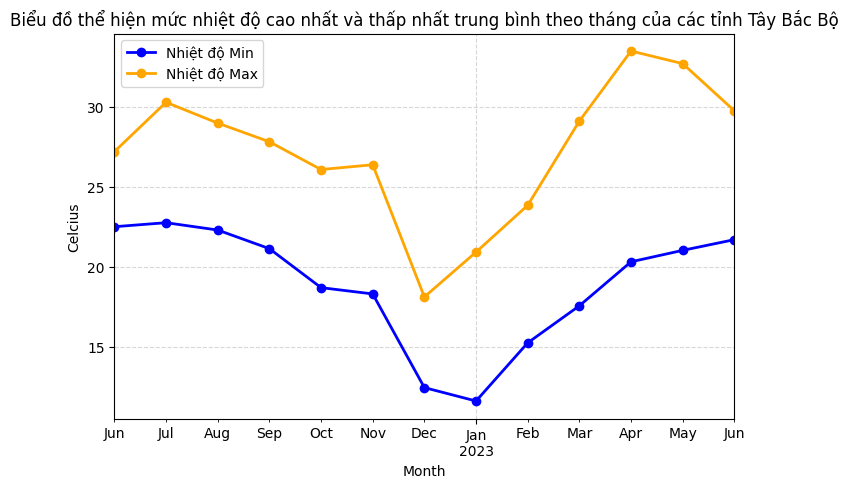

In [ ]:
plt.figure(figsize=(8,5))
average_df.groupby('Day')['TempMin'].mean().plot(label='Nhiệt độ Min', color='blue', marker='o', linestyle='-', linewidth=2)
average_df.groupby('Day')['TempeMax'].mean().plot(label='Nhiệt độ Max', color='orange', marker='o', linestyle='-', linewidth=2)
plt.savefig('Biểu đồ thể hiện mức nhiệt độ cao nhất và thấp nhất trung bình theo tháng của các tỉnh Tây Bắc Bộ', dpi=250, bbox_inches='tight')
plt.title('Biểu đồ thể hiện mức nhiệt độ cao nhất và thấp nhất trung bình theo tháng của các tỉnh Tây Bắc Bộ')
plt.xlabel('Month')
plt.ylabel('Celcius')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

+ Nhận Xét
 + Ta thấy có nhiệt độ

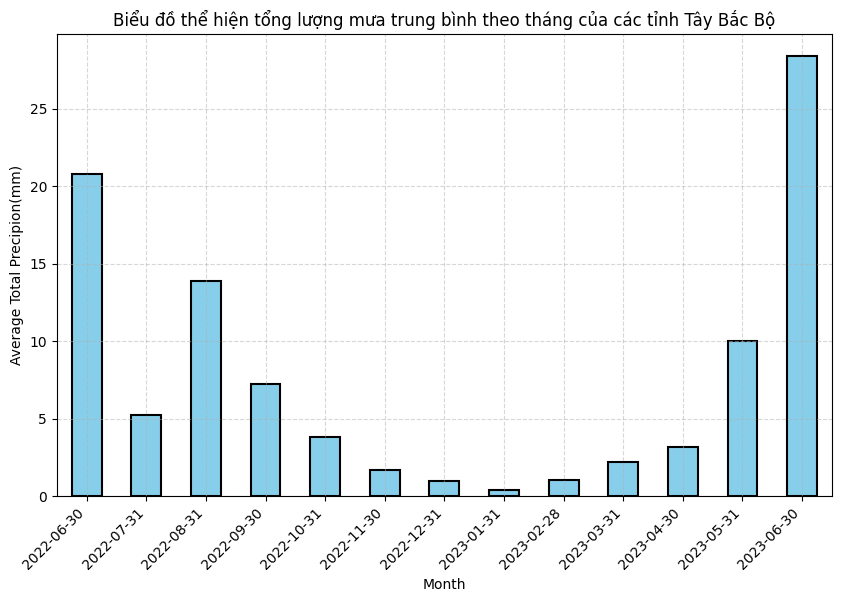

In [ ]:
plt.figure(figsize=(10, 6))
average_df.groupby('Day')['TotalPrecip_mm'].mean().plot.bar(color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Average Total Precipion(mm)')
plt.title('Biểu đồ thể hiện tổng lượng mưa trung bình theo tháng của các tỉnh Tây Bắc Bộ')
plt.savefig('Biểu đồ thể hiện tổng lượng mưa trung bình theo tháng của các tỉnh Tây Bắc Bộ', dpi=300, bbox_inches='tight')
plt.grid(True, linestyle='--', alpha=0.5)
xticks_loc = np.arange(len(average_df.index))
xticks_label = average_df.index.strftime("%Y-%m-%d")
plt.xticks(xticks_loc, xticks_label, rotation=45, ha='right')
plt.show()

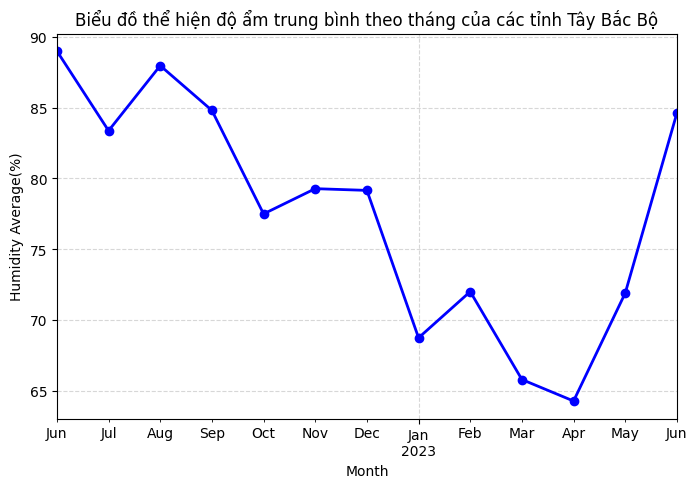

In [ ]:
plt.figure(figsize=(8, 5))
average_df.groupby('Day')['AvgHumidity'].mean().plot(color='blue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Humidity Average(%)')
plt.title('Biểu đồ thể hiện độ ẩm trung bình theo tháng của các tỉnh Tây Bắc Bộ')
plt.savefig('Biểu đồ thể hiện độ ẩm trung bình theo tháng của các tỉnh Tây Bắc Bộ')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# trung bình
average = average_df.mean()
print("Trung bình:")
print(average)

Trung bình:
TempeMax          27.276145
TempMin           18.887433
TempAvg           22.513297
MaxWind_km/h       7.312118
TotalPrecip_mm     7.602342
AvgHumidity       77.570295
Month              6.461538
dtype: float64


In [ ]:
# Độ lệch chuẩn
std_df = average_df.std()
print("\nĐộ lệch chuẩn:")
print(std_df)


Độ lệch chuẩn:
TempeMax          4.359000
TempMin           3.753105
TempAvg           3.836545
MaxWind_km/h      2.030226
TotalPrecip_mm    8.625060
AvgHumidity       8.347546
Month             3.454837
dtype: float64


In [ ]:
# Tính phương sai
var_df = average_df.var()
print("\nPhương sai:")
print(var_df)


Phương sai:
TempeMax          19.000877
TempMin           14.085798
TempAvg           14.719074
MaxWind_km/h       4.121819
TotalPrecip_mm    74.391661
AvgHumidity       69.681522
Month             11.935897
dtype: float64


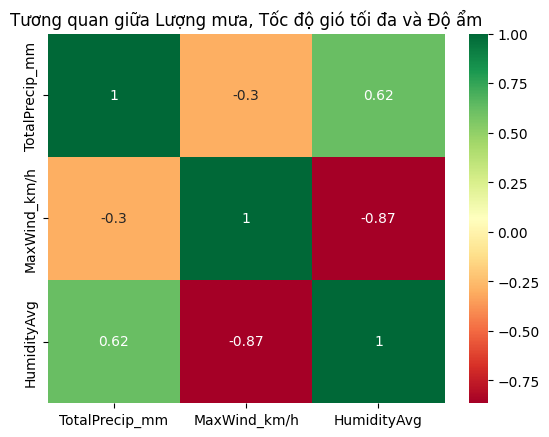

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame từ tập dữ liệu
data = {'TotalPrecip_mm': average_df['TotalPrecip_mm'],
    'MaxWind_km/h': average_df['MaxWind_km/h'],
    'HumidityAvg': average_df['AvgHumidity'] }
df = pd.DataFrame(data)
corr_matrix = df.corr()
# biểu đồ tương quan
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.title("Tương quan giữa Lượng mưa, Tốc độ gió tối đa và Độ ẩm")
plt.show()

+ Các giá trị trong biểu đồ thể hiện mức độ tương quan giữa các cặp biến. Một giá trị càng gần 1 (gần màu xanh dương) cho thấy mối tương quan dương mạnh, tức là khi một biến tăng, biến kia cũng tăng. Ngược lại, một giá trị càng gần -1 (gần màu đỏ) cho thấy mối tương quan âm mạnh,
tức là khi một biến tăng, biến kia giảm. Giá trị gần 0 (gần màu trắng) cho thấy mối tương quan yếu hoặc không có tương quan.
  + TotalPrecip_mm' (lượng mưa tổng cộng) và 'HumidityAvg' (độ ẩm trung bình) có mối tương quan dương mạnh. Điều này có nghĩa là khi lượng mưa tăng, độ ẩm cũng tăng.
  + 'MaxWind_km/h' (tốc độ gió tối đa) không có tương quan mạnh với 'TotalPrecip_mm' (lượng mưa tổng cộng) hoặc 'HumidityAvg' (độ ẩm trung bình). Điều này cho thấy không có mối liên hệ rõ ràng giữa tốc độ gió tối đa và lượng mưa hoặc độ ẩm.

#Phân tích trên tập data tổng vùng

In [ ]:
combined_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,28.9,24.4,26.4,5.0,6.2,86,Moderate rain at times,6
1,2022-06-30,27.3,23.0,25.2,3.2,20.8,86,Moderate or heavy rain shower,6
2,2022-07-01,27.7,23.2,25.3,3.2,3.7,90,Patchy rain possible,6
3,2022-07-02,33.7,24.4,28.5,4.7,0.5,78,Overcast,7
4,2022-07-03,34.0,25.0,29.5,5.4,0.3,71,Overcast,7
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,27.2,23.6,24.9,4.7,28.7,94,Moderate or heavy rain shower,6
363,2023-06-27,30.6,24.3,27.1,7.6,8.3,89,Patchy light rain with thunder,7
364,2023-06-28,31.9,25.0,27.9,8.3,9.4,85,Patchy light rain with thunder,7
365,2023-06-29,35.5,25.2,29.4,8.6,5.9,83,Light rain shower,8


In [ ]:
combined_df.dtypes

Day                 object
Temperature Max    float64
Temperature Min    float64
Temperature Avg    float64
MaxWind_km/h       float64
TotalPrecip_mm     float64
Humidity Avg         int64
Comment             object
UV Index             int64
dtype: object

In [ ]:
combined_df['Day'] = pd.to_datetime(combined_df['Day'])

In [ ]:
average = combined_df.mean()
print("Trung bình:")
print(average)

Trung bình:
Temperature Max    27.288283
Temperature Min    18.615758
Temperature Avg    22.350636
MaxWind_km/h        7.471753
TotalPrecip_mm      6.587448
Humidity Avg       76.705268
UV Index            6.158038
dtype: float64


<ipython-input-27-555adca1747f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  average = combined_df.mean()
<ipython-input-27-555adca1747f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average = combined_df.mean()


In [ ]:
std_df = combined_df.std()
print("Độ lệch chuẩn:")
print(std_df)

Độ lệch chuẩn:
Day                105 days 23:13:07.288929958
Temperature Max                       6.287185
Temperature Min                       4.542373
Temperature Avg                       4.804944
MaxWind_km/h                          3.913244
TotalPrecip_mm                        14.50889
Humidity Avg                         14.790306
UV Index                              1.401142
dtype: object


<ipython-input-28-51c3c3f43e45>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_df = combined_df.std()


In [ ]:
var_df = combined_df.var(numeric_only=True)
print("Phương sai:")
print(var_df)

Phương sai:
Temperature Max     39.528695
Temperature Min     20.633150
Temperature Avg     23.087489
MaxWind_km/h        15.313477
TotalPrecip_mm     210.507877
Humidity Avg       218.753166
UV Index             1.963200
dtype: float64


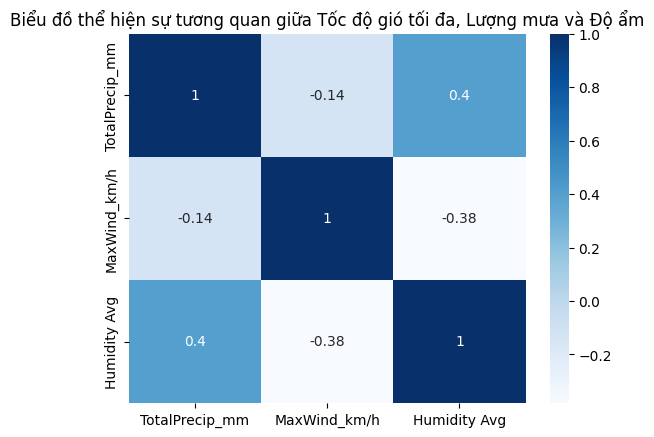

In [ ]:
data = {'TotalPrecip_mm': combined_df['TotalPrecip_mm'],
        'MaxWind_km/h': combined_df['MaxWind_km/h'],
        'Humidity Avg': combined_df['Humidity Avg']}
df = pd.DataFrame(data)
# Tính ma trận hệ số tương quan
corr_matrix = df.corr()
# Vẽ biểu đồ hệ số tương quan
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Biểu đồ thể hiện sự tương quan giữa Tốc độ gió tối đa, Lượng mưa và Độ ẩm")
plt.show()

**Nhận xét:**
Các giá trị trong biểu đồ thể hiện mức độ tương quan tuyến tính giữa các biến.
+ Nếu giá trị càng gần 1 (màu xanh lam thẫm) thì cho thấy quan hệ tuyến tính dương giữa hai biến càng mạnh, hai biến đồng biến với nhau.
+ Ngược lại, nếu giá trị càng gần -1 (màu trắng) cho thấy quan hệ tuyến tính âm càng mạnh, hai biến nghịch biến với nhau
+ Giá trị gần bằng 0 cho thấy mối tương quan yếu hoặc không có quan hệ tuyến tính giữa 2 biến.

Từ đó ta rút ra:
+ TotalPrecip_mm' (Tổng lượng mưa) và 'HumidityAvg' (Độ ẩm trung bình) có mối tương quan dương mạnh với nhau. Tức là là khi lượng mưa càng tăng, thì độ ẩm cũng tăng.
+ 'MaxWind_km/h' (Tốc độ gió tối đa) gần như không có mối tương quan với 2 biến còn lại 'TotalPrecip_mm' (Tổng lượng mưa) và 'HumidityAvg' (Độ ẩm trung bình). Điều này cho thấy rằng không có mối liên hệ rõ ràng nào giữa tốc độ gió tối đa và lượng mưa hoặc độ ẩm.

In [ ]:
# Đếm số lượng mỗi loại comment
comment_counts = combined_df['Comment'].value_counts()
comment_counts

Patchy rain possible                   546
Moderate or heavy rain shower          355
Overcast                               242
Sunny                                  230
Partly cloudy                          181
Light rain shower                      156
Moderate rain at times                 135
Cloudy                                  97
Heavy rain at times                     80
Patchy light rain with thunder          58
Thundery outbreaks possible             35
Fog                                     26
Mist                                    15
Light drizzle                           13
Heavy rain                               9
Torrential rain shower                   8
Light rain                               6
Patchy light rain                        4
Patchy light drizzle                     3
Moderate rain                            2
Moderate or heavy rain with thunder      1
Name: Comment, dtype: int64

## Nhận Xét
+ "Patchy rain possible" có số lượng comment cao nhất, đạt 848 comment. Điều này cho thấy về khả năng có mưa rải rác là lớn nhất.

+ "Moderate or heavy rain shower" và "Overcast" cũng xảy ra nhiều với 569 và 466 comment tương ứng. Điều này cho thấy thông tin về khả năng mưa vừa hoặc mưa nặng cũng như tình trạng trời nhiều mây.

+ "Light rain shower", "Partly cloudy", "Moderate rain at times", và "Sunny" cũng có với số lượng comment từ 250 đến 371. Điều này cho thấy thông tin về khả năng có mưa nhẹ, trời phần nhiều mây, mưa vừa lúc và trời nắng.

+ Các loại thời tiết khác như "Cloudy", "Heavy rain at times", "Thundery outbreaks possible", "Patchy light rain with thunder", "Light drizzle", "Mist", "Light rain", "Torrential rain shower", "Fog", "Moderate rain", "Patchy light drizzle", "Patchy light rain" và "Heavy rain" cũng nhận được một số lượng comment, tuy nhiên số lượng này thấp hơn so với nhóm trên.

Tổng quan, các loại thời tiết như mưa rải rác, mưa vừa hoặc mưa nặng, và tình trạng trời nhiều mây thu hút sự quan tâm lớn của người dùng trong các bình luận về thời tiết.

In [ ]:
combined_df.dtypes

Day                datetime64[ns]
Temperature Max           float64
Temperature Min           float64
Temperature Avg           float64
MaxWind_km/h              float64
TotalPrecip_mm            float64
Humidity Avg                int64
Comment                    object
UV Index                    int64
dtype: object

In [ ]:
average_df

,TempeMax,TempMin,TempAvg,MaxWind_km/h,TotalPrecip_mm,AvgHumidity,Month
Day,,,,,,,
2022-06-30,27.191667,22.500000,24.708333,5.158333,20.776667,89.000000,6.0
2022-07-31,30.276882,22.751075,26.123656,6.363441,5.223280,83.370968,7.0
2022-08-31,28.976344,22.293011,25.175806,5.598387,13.866398,87.967742,8.0
2022-09-30,27.810556,21.128889,23.926111,5.804444,7.249444,84.805556,9.0
2022-10-31,26.073656,18.692473,21.849462,6.793011,3.793333,77.494624,10.0
2022-11-30,26.373333,18.298889,21.712778,6.251667,1.687222,79.277778,11.0
2022-12-31,18.111828,12.444086,14.912903,5.627957,1.009140,79.155914,12.0
2023-01-31,20.913441,11.605376,15.650538,6.988710,0.391398,68.741935,1.0
2023-02-28,23.838690,15.241667,18.941667,8.169643,1.041667,72.005952,2.0


In [ ]:
# plt.figure(figsize=(8,5))
# combined_df.groupby('Day')['Temperature Min'].mean().plot(label='Nhiệt độ Min', color='blue', marker='o', linestyle='-', linewidth=2)
# combined_df.groupby('Day')['Temperature Max'].mean().plot(label='Nhiệt độ Max', color='orange', marker='o', linestyle='-', linewidth=2)

# plt.title('Biểu đồ thể hiện mức nhiệt độ cao nhất và thấp nhất trung bình theo tháng của các tỉnh Đồng bằng sông Hồng')
# plt.xlabel('Month')
# plt.ylabel('Celcius')
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.show()

##Kết luận
+ có thể thấy thởi tiết thường là mưa . Điều này cho thấy thời tiêt mưa vừa hoặc mưa nặng cũng như tình trạng trời nhiều mây là phổ biết nhiều nhất luôn chiếm phần lớn

#Phân Tích 1 trong những tỉnh quan trọng nhất tây bắc bộ

##Sơn La

+ Trong số các tỉnh này, có thể coi Sơn La là một trong những tỉnh quan trọng nhất. Sơn La không chỉ có vị trí chiến lược trên tuyến giao thông quan trọng từ phía Tây sang Hà Nội và các khu vực khác, mà còn là một tỉnh có diện tích lớn và đa dạng về địa hình, tài nguyên tự nhiên và dân tộc

In [ ]:
f5.describe()

,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,UV Index
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,28.875204,17.868392,22.444414,6.342779,6.160490,73.419619,6.517711
std,5.658183,3.857706,4.072273,2.702083,12.739744,17.541627,1.374668
min,13.000000,6.500000,10.900000,2.200000,0.000000,23.000000,3.000000
25%,25.350000,14.900000,20.100000,4.600000,0.000000,64.000000,6.000000
50%,28.600000,19.100000,22.700000,5.400000,0.400000,76.000000,6.000000
75%,31.750000,20.900000,25.200000,7.600000,5.450000,87.000000,7.000000
max,44.700000,24.400000,32.900000,19.100000,80.300000,100.000000,10.000000


**Nhận xét:**
Nhìn sơ qua bảng thống kê mô tả trên về tập dữ liệu của Sơn La thì ta có thể rút ra một vài đánh giá ban đầu như sau:
+ 1,Nhiêt độ:
  - Nhiệt độ cao nhất hàng ngày trung bình khoảng 28.9 độ C ,Có thẻ đạt tới 44.7
  Độ C. Điều này cho thấy Sơn La Có thể trải qua nhưng ngày nóng nhiều
  - Nhiệt độ thấp nhất hàng ngày trung bình khoảng 17.9 độ C trong ngày có nhiệt giảm xuống thấp nhất là 6.5 độ C
  - Nhiệt độ trung bình hàng ngày là khoảng 22.4 độ C, với khoảng biến động là  4.07  độ C.Các con số này cho thấy khá ổn định và thoải mái về mức độ nhiệt độ TB
+ 4,Tốc độ gió
  - Tốc độ gió trung bình hàng ngày là khoảng 6.34 km/h, với độ lệch chuẩn là khoảng 2.70 km/h. Giá trị nhỏ nhất là 2.2 km/h và lớn nhất là 19.1 km/h.Điều này cho ta thấy tốc độ gió không quá mạnh,ổn định trong khoảng giá trị này
+ 3, Lượng mưa
  -Tổng lượng mưa trung bình trong thời gian trên là khoảng 6.16 mm, và độ lệch chuẩn là khoảng 12.74 mm. Giá trị nhỏ nhất là 0.0 mm là những ngày không có mưa và giá trị lớn nhất là 80.3 mm.Cho thấy lạng sơn đã có thể trải qua những trận mưa lớn
+ 4,Độ ẩm
  - Độ ẩm trung bình hàng ngày là khoảng 73.42%, với độ lệch chuẩn là khoảng 17.54%. Giá trị nhỏ nhất là 23% và giá trị lớn nhất là 100%.Thấy rằng độ ẩm Lạng Sơn có sự biết đổi lớn
+ 5,UV
  - Chỉ số tia cực tím hàng ngày có giá trị trung bình là khoảng 6.52, với độ lệch chuẩn là khoảng 1.37. Giá trị nhỏ nhất là 3 và giá trị lớn nhất là 10

  => Tổng quan, dữ liệu này cho thấy Lạng Sơn có khí hậu nóng ẩm và có thể trải qua những ngày nóng nhiều, những ngày có mưa và sự biến đổi về nhiệt độ và độ ẩm. Chỉ số tia cực tím (UV Index) cũng cho thấy tình trạng nguy hại với mức độ tăng dần.


In [ ]:
f5[f5['Temperature Max'] == f5['Temperature Max'].max()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
289,2023-04-14,44.7,20.8,31.0,12.2,0.0,33,Sunny,10


In [ ]:
f5[f5['Temperature Min'] == f5['Temperature Min'].min()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
214,2023-01-29,19.4,6.5,11.9,6.1,0.0,54,Sunny,5


In [ ]:
f5[f5['UV Index'] == f5['UV Index'].max()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
286,2023-04-11,40.4,20.4,28.7,9.7,0.0,31,Sunny,10
289,2023-04-14,44.7,20.8,31.0,12.2,0.0,33,Sunny,10
292,2023-04-17,40.8,21.4,29.9,13.3,0.0,36,Sunny,10
293,2023-04-18,41.2,22.4,31.3,13.7,0.0,26,Sunny,10
294,2023-04-19,42.9,23.5,32.9,15.1,0.0,23,Sunny,10
295,2023-04-20,41.4,22.7,31.7,14.0,0.0,24,Sunny,10
299,2023-04-24,40.5,19.9,27.6,8.6,0.2,48,Sunny,10
311,2023-05-06,40.0,23.4,30.6,11.9,0.0,40,Sunny,10
312,2023-05-07,41.0,24.4,30.8,6.8,0.1,44,Sunny,10
325,2023-05-20,40.2,21.5,28.7,9.0,0.0,47,Sunny,10


In [ ]:
f5[f5['TotalPrecip_mm'] != 0]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,25.8,21.6,23.5,3.6,12.2,94,Moderate or heavy rain shower,6
1,2022-06-30,25.3,22.1,23.1,4.0,43.7,97,Moderate or heavy rain shower,6
2,2022-07-01,27.9,22.0,23.9,3.2,4.1,93,Heavy rain at times,6
3,2022-07-02,30.4,21.7,25.2,4.0,3.4,84,Moderate rain at times,7
4,2022-07-03,29.0,22.4,25.2,6.5,3.0,88,Patchy rain possible,6
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,25.1,19.3,22.3,4.0,21.6,92,Moderate or heavy rain shower,6
363,2023-06-27,26.9,19.2,22.9,3.6,29.9,92,Moderate or heavy rain shower,6
364,2023-06-28,28.2,20.6,24.0,4.7,28.5,88,Patchy light rain with thunder,6
365,2023-06-29,28.0,21.2,24.3,4.3,17.1,87,Moderate or heavy rain shower,6


In [ ]:
f5.isnull().sum()

Day                0
Temperature Max    0
Temperature Min    0
Temperature Avg    0
MaxWind_km/h       0
TotalPrecip_mm     0
Humidity Avg       0
Comment            0
UV Index           0
dtype: int64

In [ ]:
f5.info

<bound method DataFrame.info of             Day  Temperature Max  Temperature Min  Temperature Avg  \
0    2022-06-29             25.8             21.6             23.5   
1    2022-06-30             25.3             22.1             23.1   
2    2022-07-01             27.9             22.0             23.9   
3    2022-07-02             30.4             21.7             25.2   
4    2022-07-03             29.0             22.4             25.2   
..          ...              ...              ...              ...   
362  2023-06-26             25.1             19.3             22.3   
363  2023-06-27             26.9             19.2             22.9   
364  2023-06-28             28.2             20.6             24.0   
365  2023-06-29             28.0             21.2             24.3   
366  2023-06-30             32.6             22.0             25.5   

     MaxWind_km/h  TotalPrecip_mm  Humidity Avg  \
0             3.6            12.2            94   
1             4.0        

In [ ]:
f5.dtypes

Day                 object
Temperature Max    float64
Temperature Min    float64
Temperature Avg    float64
MaxWind_km/h       float64
TotalPrecip_mm     float64
Humidity Avg         int64
Comment             object
UV Index             int64
dtype: object

+ Thông qua bảng data đại diện của Sơn La, thì ta có thể rút ra nhận xét, mỗi bảng dữ liệu đều gồm có 367 dòng (thời gian từ 29/06/2022 - 30/06/2023) và 9 cột thuộc tính gồm (2 biến định tính và 7 biến định lượng)
+ Tuy nhiên kiểu dữ liệu cột Date ở đây đang lưu chưa đúng kiểu dữ liệu => Chỉnh sửa
+ Ý nghĩa của các thuộc tính:
+ Day: Ngày quan sát lấy dữ liệu
+ Temperature Max: Nhiệt độ cao nhất(độ C) trong ngày đó.
+ Temperature Min: Nhiệt độ thấp nhất(độ C) trong ngày đó.
+ Temperature Avg: Nhiệt độ trung bình(độ C) trong ngày đó.
+ MaxWind_km/h: Sức(Tốc độ) gió lớn nhất(km/h) trong ngày đó.
+ TotalPrecip_mm: Tổng lượng mưa(mm) trong ngày đó.
+ Humidity Avg: Độ ẩm trung bình(%) trong ngày đó.
+ Comment: Các ghi chú hoặc thông tin dự báo khác về ngày đó.
+ UV Index: Chỉ số tia tử ngoại trong ngày đó.

In [ ]:
# Đếm số lượng mỗi loại comment
comment_counts = f5['Comment'].value_counts()
comment_counts

Patchy rain possible              80
Moderate or heavy rain shower     59
Sunny                             54
Overcast                          51
Partly cloudy                     29
Moderate rain at times            21
Light rain shower                 15
Heavy rain at times               12
Fog                               12
Cloudy                            12
Patchy light rain with thunder     7
Thundery outbreaks possible        5
Mist                               4
Torrential rain shower             2
Heavy rain                         2
Patchy light rain                  1
Light drizzle                      1
Name: Comment, dtype: int64

## Nhận Xét mưa 1 tỉnh
+ "Patchy rain possible" có số lượng comment cao nhất, đạt 80 comment. Điều này cho thấy thông tin về khả năng có mưa rải rác vẫn lớn nhất.

+ "Moderate or heavy rain shower" và "Sunny" cũng có số lượng comment khá đáng kể, lần lượt là 42 và 41 comment. Điều này cho thấy có thể mưa vừa hoặc mưa nặng cũng như tình trạng trời phần nhiều mây.

+ "Overcast", "Partly cloudy  ", "Moderate rain at times" cũng nhận được một số lượng comment từ 19 đến 39. Điều này cho thấy  tình trạng trời nhiều mây, trời nắng, trời có mây, mưa nhẹ và mưa vừa cũng có thể xảy ra.

+ Các loại thời tiết khác như "Mist", "Patchy light rain with thunder", "Fog", "Thundery outbreaks possible", "Moderate rain", "Light rain", "Light drizzle", "Patchy light drizzle", "Patchy light rain", "Heavy rain" và "Torrential rain shower" cũng nhận được một số lượng comment nhưng ít hơn so với nhóm trên.

Tổng quan, các loại thời tiết như mưa rải rác, mưa vừa hoặc mưa nặng, tình trạng trời phần nhiều mây, trời nắng và mưa rải rác chiếm phần lớn trong comment về thời tiết.

In [ ]:
#chỉnh sửa kiểu dữ liệu Day
f5["Day"] = pd.to_datetime(f5["Day"])

##Kiểm tra lỗi trùng lặp dữ liệu

In [ ]:
f5["Day"].duplicated().sum()

0

+ Không tồn tại lỗi trùng lặp

##Kiểm tra lỗi Logic

In [ ]:
(f5['Temperature Max'] < f5['Temperature Min']).sum()

0

In [ ]:
f5[(f5['Temperature Max'] + f5['Temperature Min'])/2 != f5['Temperature Avg']]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,25.8,21.6,23.5,3.6,12.2,94,Moderate or heavy rain shower,6
1,2022-06-30,25.3,22.1,23.1,4.0,43.7,97,Moderate or heavy rain shower,6
2,2022-07-01,27.9,22.0,23.9,3.2,4.1,93,Heavy rain at times,6
3,2022-07-02,30.4,21.7,25.2,4.0,3.4,84,Moderate rain at times,7
4,2022-07-03,29.0,22.4,25.2,6.5,3.0,88,Patchy rain possible,6
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,25.1,19.3,22.3,4.0,21.6,92,Moderate or heavy rain shower,6
363,2023-06-27,26.9,19.2,22.9,3.6,29.9,92,Moderate or heavy rain shower,6
364,2023-06-28,28.2,20.6,24.0,4.7,28.5,88,Patchy light rain with thunder,6
365,2023-06-29,28.0,21.2,24.3,4.3,17.1,87,Moderate or heavy rain shower,6


In [ ]:
(f5['Temperature Max'][0] + f5['Temperature Min'][0])/2

23.700000000000003

+ Cột "Temperature Avg" không phản ánh đúng giá trị trung bình của nhiệt độ, vì giá trị "Temperature Avg" không phải là trung bình cộng của "Temperature Max" và "Temperature Min". Ví dụ: dòng 0 có "Temperature Max" là 25.8 và "Temperature Min" là 21.6, nhưng "Temperature Avg" lại là 23.5.

+ Dữ liệu thiếu thông tin: Tập dữ liệu không cung cấp thông tin về đơn vị đo cho các cột dữ liệu như nhiệt độ (độ C hay độ F), tốc độ gió (km/h hay m/s), lượng mưa (mm hay inch), độ ẩm (% hay g/m³).

In [ ]:
print(f5['TotalPrecip_mm'][62])
print(f5['Comment'][62])

0.5
Moderate rain at times


+ Chênh lệch dữ liệu "TotalPrecip_mm" và "Comment": Cột "TotalPrecip_mm" chỉ có giá trị 0.6mm, trong khi cột "Comment" lại cho biết "Moderate rain at times". Điều này có thể gây nhầm lẫn về mức độ mưa trong ngày đó.

In [ ]:
print(f5['TotalPrecip_mm'][57],"                          |",f5['TotalPrecip_mm'][34])
print(f5['Comment'][57],"|",f5['Comment'][34])

2.2                           | 9.6
Moderate or heavy rain shower | Moderate rain at times


+ ta nhận thấy một sự vô lý của dữ liệu ở 2 cột "TotalPrecip_mm" và "Comment" vì khi mưa vừa và to thì lượng mưa chỉ đạt 2.2mm,còn khi mưa vừa thi lượng mưa đạt lên đến 9.6mm
+ còn rất nhiều dòng có dữ liệu không phù hợp thực tế sai logic

+ còn khá nhiều lỗi liên quan đến logic dữu liệu của các cột
  +  vd: tốc độ gió thường là gió to sẽ đi đôi với mưa lớn và ngược lại nhưng trê dữ liệu không hề thõa mãn dk trên có khi gió đạt 10 mưa thì chỉ 0.7 khi gió chỉ 4 nhưng mưa lên đến 40-50

In [ ]:
f5.describe()

,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,UV Index
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,28.875204,17.868392,22.444414,6.342779,6.160490,73.419619,6.517711
std,5.658183,3.857706,4.072273,2.702083,12.739744,17.541627,1.374668
min,13.000000,6.500000,10.900000,2.200000,0.000000,23.000000,3.000000
25%,25.350000,14.900000,20.100000,4.600000,0.000000,64.000000,6.000000
50%,28.600000,19.100000,22.700000,5.400000,0.400000,76.000000,6.000000
75%,31.750000,20.900000,25.200000,7.600000,5.450000,87.000000,7.000000
max,44.700000,24.400000,32.900000,19.100000,80.300000,100.000000,10.000000


In [ ]:
f5[f5['TotalPrecip_mm'] == 0]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
69,2022-09-06,29.9,20.4,24.5,4.3,0.0,74,Overcast,6
70,2022-09-07,29.5,19.6,24.3,7.9,0.0,69,Partly cloudy,7
90,2022-09-27,31.1,18.9,23.9,5.0,0.0,74,Overcast,7
103,2022-10-10,21.2,17.5,19.5,5.8,0.0,89,Cloudy,5
104,2022-10-11,24.2,16.0,19.6,4.3,0.0,84,Overcast,5
...,...,...,...,...,...,...,...,...,...
323,2023-05-18,38.4,20.4,27.6,8.3,0.0,56,Partly cloudy,9
324,2023-05-19,36.4,20.5,27.1,6.8,0.0,51,Sunny,9
325,2023-05-20,40.2,21.5,28.7,9.0,0.0,47,Sunny,10
326,2023-05-21,41.3,21.5,29.9,12.2,0.0,45,Sunny,10


In [ ]:
# Lọc dữ liệu của tháng 6/2023 ở sonla:
JuneSL_df = f5.loc[(f5['Day'].dt.year.isin([2023])) & (f5['Day'].dt.month.isin([6]))]
JuneSL_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
337,2023-06-01,36.8,20.2,27.2,6.8,6.3,68,Thundery outbreaks possible,8
338,2023-06-02,37.1,20.7,27.3,7.6,5.3,68,Patchy rain possible,8
339,2023-06-03,33.5,21.3,26.6,7.2,8.9,68,Moderate or heavy rain shower,7
340,2023-06-04,29.5,20.6,24.5,5.0,39.0,85,Patchy light rain with thunder,6
341,2023-06-05,26.0,19.6,22.5,4.0,28.9,95,Torrential rain shower,6
342,2023-06-06,26.7,19.6,23.5,3.2,42.7,91,Patchy light rain with thunder,6
343,2023-06-07,27.5,19.9,23.7,4.3,30.5,89,Moderate or heavy rain shower,6
344,2023-06-08,29.9,21.2,24.4,4.0,27.3,85,Moderate or heavy rain shower,6
345,2023-06-09,23.1,19.0,21.4,3.2,72.3,98,Moderate or heavy rain shower,5
346,2023-06-10,25.1,19.7,22.6,4.0,25.7,92,Moderate or heavy rain shower,6


In [ ]:
# Lọc dữ liệu của tháng 5/2023 ở Sơn La:
MaySL_df =f5.loc[(f5['Day'].dt.year.isin([2023])) & (f5['Day'].dt.month.isin([5]))]
MaySL_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
306,2023-05-01,32.1,19.5,23.2,7.2,18.7,78,Moderate or heavy rain shower,7
307,2023-05-02,34.3,19.8,25.0,7.2,5.0,73,Fog,7
308,2023-05-03,30.5,18.4,24.3,7.6,13.3,77,Light rain shower,7
309,2023-05-04,37.1,20.8,27.8,12.6,0.0,55,Partly cloudy,9
310,2023-05-05,39.2,22.1,29.9,12.6,0.0,45,Sunny,9
311,2023-05-06,40.0,23.4,30.6,11.9,0.0,40,Sunny,10
312,2023-05-07,41.0,24.4,30.8,6.8,0.1,44,Sunny,10
313,2023-05-08,35.7,18.5,25.9,7.9,14.9,69,Patchy light rain with thunder,8
314,2023-05-09,30.3,19.3,24.0,5.4,14.2,81,Light rain shower,7
315,2023-05-10,28.9,21.1,23.6,6.1,43.1,84,Light rain shower,6


In [ ]:
average_df

,TempeMax,TempMin,TempAvg,MaxWind_km/h,TotalPrecip_mm,AvgHumidity,Month
Day,,,,,,,
2022-06-30,27.191667,22.500000,24.708333,5.158333,20.776667,89.000000,6.0
2022-07-31,30.276882,22.751075,26.123656,6.363441,5.223280,83.370968,7.0
2022-08-31,28.976344,22.293011,25.175806,5.598387,13.866398,87.967742,8.0
2022-09-30,27.810556,21.128889,23.926111,5.804444,7.249444,84.805556,9.0
2022-10-31,26.073656,18.692473,21.849462,6.793011,3.793333,77.494624,10.0
2022-11-30,26.373333,18.298889,21.712778,6.251667,1.687222,79.277778,11.0
2022-12-31,18.111828,12.444086,14.912903,5.627957,1.009140,79.155914,12.0
2023-01-31,20.913441,11.605376,15.650538,6.988710,0.391398,68.741935,1.0
2023-02-28,23.838690,15.241667,18.941667,8.169643,1.041667,72.005952,2.0


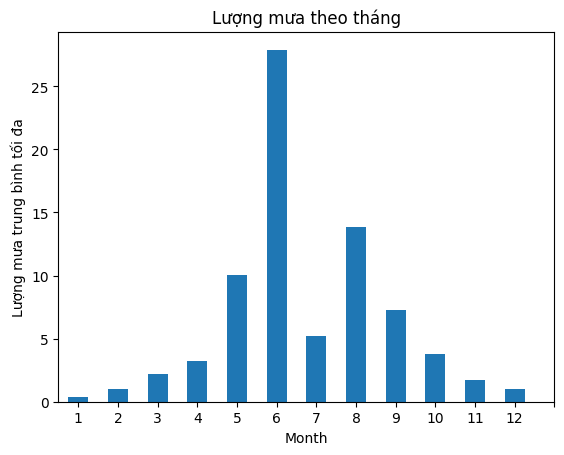

In [10]:
# Tạo cột "Month" để lưu giữ thông tin về tháng của mỗi ngày
average_df["Month"] = average_df["Day"].dt.month
# Gom nhóm dữ liệu theo cột "Month" và tính trung bình của cột "TempeMax" cho mỗi nhóm
average_temp_by_month = average_df.groupby("Month")["TotalPrecip_mm"].mean()
average_temp_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Lượng mưa trung bình tối đa")
plt.title("Lượng mưa theo tháng")
plt.xticks(range(0, 13),rotation=0)
plt.show()

In [11]:
MaySL_df["Day"] = pd.to_datetime(MaySL_df["Day"])

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
MaySL_df.groupby('Day')['TotalPrecip_mm'].mean().plot.bar(color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Day')
plt.ylabel('Average Total Precipion(mm)')
plt.title('Biểu đồ thể hiện tổng lượng mưa trong tháng 5/2023 của Hà Nội')
plt.grid(True, linestyle='--', alpha=0.5)
xticks_loc = np.arange(len(MaySL_df.index))
xticks_label = MaySL_df["Day"].dt.strftime("%Y-%m-%d")
plt.xticks(xticks_loc, xticks_label, rotation=45, ha='right')
plt.show()

NameError: ignored

+ ta thấy là thấy lượng mưa của tháng 5 là một trong nhưng lượng mưa khá ít trong năm có ta xét trên từng ngày của tháng thì lượng mưa cao nhất trong ngày chỉ đạt hơn 70mm còn lại đa phần không mưa
 + => kết luận: tháng 5 vừa qua nắng nóng, khô hạn kéo dài + mưa ít khiến cho nguồn điện từ các nhà máy thủy điện tạo ra khá là ít, khiến cho nhà máy thủy điện Sơn không thể cung cấp điện tốt cho các vùng là trong khoảng thời gian này bị cắt điện gián đoạn.

In [ ]:
plt.figure(figsize=(8, 5))
MaySL_df.groupby('Day')['Temperature Max'].mean().plot(color='red', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Temperature Max (Celcius)')
plt.title('Biểu đồ thể hiện mức nhiệt độ lớn nhất trong tháng 5/2023 của SonLa')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

+ Nhiệt độ màu hè tại sơn la thì không quá cao nhưng có một vài ngày đạt đến 38 độ .Cho ta thấy với nhiệt độ này dường như lượng hơi nước không đủ để tạo nên nhiều cơn mưa trong tháng 5